In [1]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import numpy as np
from PIL import Image

mpl.rc("font", family="Malgun Gothic")
mpl.rc("axes", unicode_minus=False)
set_matplotlib_formats("retina")

In [2]:
file = open("naver_news_articles.csv", "r")
articles = file.readlines()
file.close()

In [3]:
articles = [article for article in articles if len(article) >= 100]

In [4]:
articles[0:3]

['\t02월 28일 HDC현대산업개발(294870)은 수주공시를 발표했다.◆HDC현대산업개발 수주공시 개요- 안양 임곡3지구 주택재개발정비사업 변경계약 2,079.1억원 (매출액대비 3.9%)HDC현대산업개발(294870)은 안양 임곡3지구 주택재개발정비사업 변경계약에 관한 단일판매ㆍ공급계약체결을 28일에 공시했다.계약 상대방은 안양 임곡3지구 주택재개발정비사업조합이고, 계약금액은 2,079.1억원 규모로 최근 HDC현대산업개발 매출액 5.36조 대비 약 3.9% 수준이다. 이번 계약의 기간은 확인되지 않았다.한편 이번 계약수주는 2019년 02월 28일에 체결된 것으로 보고되었다.차트수주 공시는 향후 기업의 실적에 직접적인 영향을 미치기 때문에 계약의 규모, 계약 기간 등에 대해서 주의 깊게 살펴볼 필요가 있다. 특히 수주 공시가 늘어나는데 주가는 움직이지 않는다면 매수 관점에서 접근해 볼 수도 있다.한경로보뉴스이 기사는 한국경제신문과 금융 AI 전문기업 씽크풀이 공동 개발한 기사 자동생성 알고리즘에 의해 실시간으로 작성된 것입니다.[한경닷컴 바로가기] [모바일한경 구독신청] 네이버에서 한국경제 채널 구독하기 <자세히 보기> ⓒ 한국경제 & hankyung.com, 무단전재 및 재배포 금지\n',
 "\t[아시아경제 조호윤 기자]HDC현대산업개발은 안양 임곡3지구 주택재개발정비사업조합과 '안양 임곡3지구 주택재개발정비사업 변경 계약'을 체결했다고 28일 공시했다. 계약금 규모는 2079억원이다.조호윤 기자 hodoo@asiae.co.kr▶ 아시아경제 채널 추가하고 에어팟, 해외여행비 받자!▶ 재미와 신기 '과학을읽다' ▶ 꿀잼 '인기만화'<ⓒ경제를 보는 눈, 세계를 보는 창 아시아경제 무단전재 배포금지>\n",
 "\t HDC현대산업개발은 안양 임곡3지구 주택재개발정비사업조합과 '안양 임곡3지구 주택재개발정비사업 변경 계약'을 체결했다고 28일 공시했다. 계약금 규모는 2079억원이다. nvcess@fnnews.com 이정은 기자 ▶ 세상의 모든 골 때리는

In [5]:
okt = Okt()

morphs = []
for sentence in articles:
    morphs.append(okt.pos(sentence, stem=True))

nouns = []
for sentence in morphs :
    for word, tag in sentence :
        if tag in ["Noun"] and len(word) >= 2:
            nouns.append(word)

count = Counter(nouns)
words = dict(count.most_common())

In [6]:
print(words)

{'개발': 37, '투자': 26, '산업': 23, '증권': 20, '의견': 19, '주가': 18, '목표': 16, '현대': 15, '사업': 15, '기자': 14, '종목': 14, '수주': 13, '공시': 12, '대비': 12, '기업': 12, '경제': 12, '최근': 11, '한국': 11, '제시': 11, '계약': 10, '규모': 10, '구독': 10, '무단': 10, '배포': 10, '금지': 10, '대한': 10, '주택': 9, '이번': 9, '점수': 9, '보증': 9, '기사': 8, '네이버': 8, '채널': 8, '분석': 8, '전체': 8, '뉴시스': 8, '결정': 8, '채무': 8, '안양': 7, '임곡': 7, '지구': 7, '재개발': 7, '정비': 7, '해외': 7, '건설': 7, '수준': 6, '매수': 6, '유지': 6, '컨센서스': 6, '발표': 5, '기간': 5, '대해': 5, '뉴스': 5, '전문': 5, '수익률': 5, '상승': 5, '자본': 5, '조정': 5, '디벨로퍼': 5, '전자신문': 5, '지원': 5, '공항': 5, '제육': 5, '유안': 5, '변경': 4, '체결': 4, '한편': 4, '바로가기': 4, '라이온': 4, '개월': 4, '진단': 4, '모멘텀': 4, '기록': 4, '측면': 4, '인공': 4, '지능': 4, '시장': 4, '전망': 4, '정보': 4, '협의': 4, '케이': 4, '조합': 3, '금액': 3, '실적': 3, '관점': 3, '금융': 3, '실시간': 3, '작성': 3, '보기': 3, '아시아': 3, '저작권': 3, '그림': 3, '추세': 3, '하락': 3, '상장': 3, '위치': 3, '또한': 3, '성장': 3, '수익': 3, '재무': 3, '기준': 3, '증권사': 3, '리포트': 3, '평균': 3, '해당': 3, '추이': 3, 

In [7]:
pic = "mask_image.jpg"

icon = Image.open(pic).convert("RGBA")
mask = Image.new("RGB",icon.size, (255, 255, 255))
mask.paste(icon, icon)
mask = np.array(mask)
      
wc = WordCloud(font_path="C:/Windows/Fonts/HMKMRHD.TTF", background_color="black", width=800, height=800, max_words=30000, mask=mask, max_font_size=90)

coloring = np.array(Image.open(pic))
image_colors = ImageColorGenerator(coloring)
image_colors.default_color = [0, 0, 0]

wc.generate_from_frequencies(words)
wc.recolor(None, image_colors)

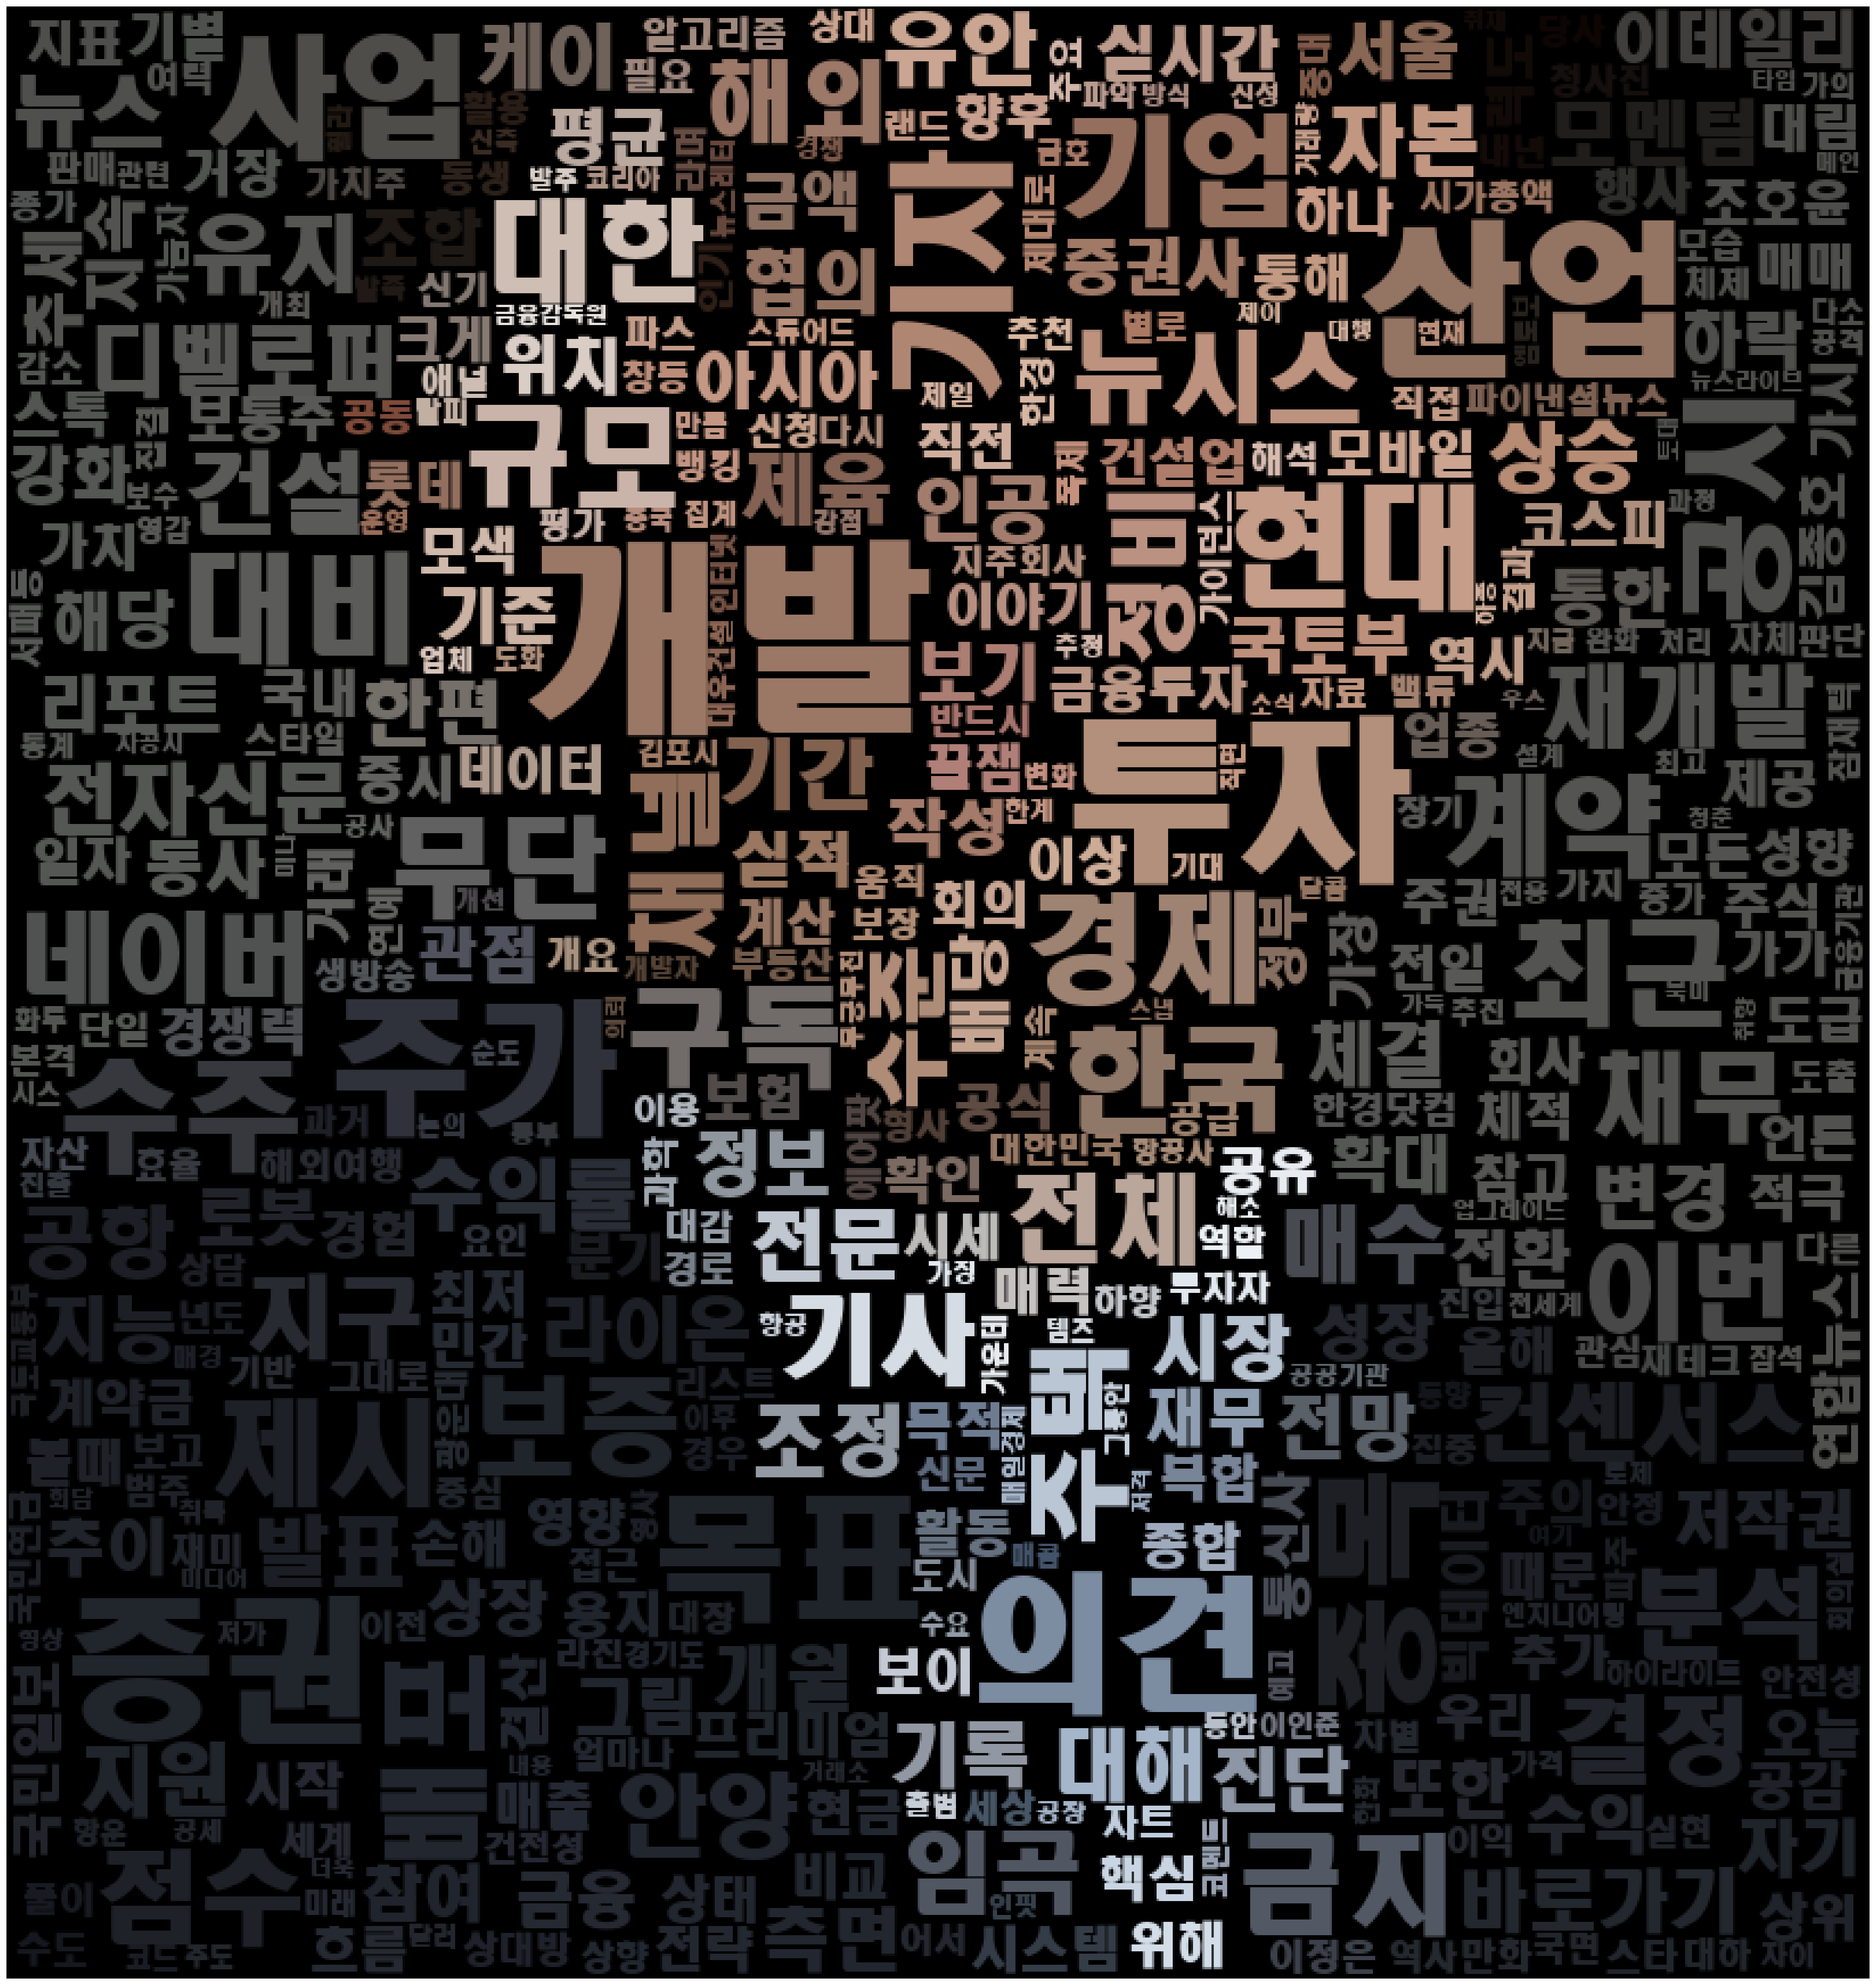

In [8]:
fig, ax = plt.subplots(figsize=(30, 30))

ax.imshow(wc)
ax.axis("off")

fig.tight_layout()
wc.to_file("wordcloud_200905.png")